In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/SPAM text message 20170820 - Data.csv")

In [3]:
print(df.head(10))

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...


In [4]:
df["Category"].replace({'ham': 0 ,'spam': 1}, inplace=True)
print(df.head(10))

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
5         1  FreeMsg Hey there darling it's been 3 week's n...
6         0  Even my brother is not like to speak with me. ...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...


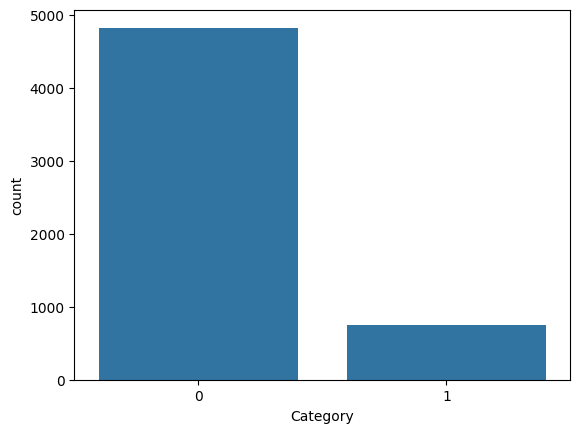

In [5]:
sns.countplot(x=df["Category"])
plt.show()

In [6]:
X = df["Message"]
Y = df["Category"]

In [7]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [9]:
print(Y)
print(Y.shape)

[0 0 1 ... 0 0 0]
(5572,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)
print(seq)

[[3, 134, 189, 88, 11, 7, 49, 47, 35, 405, 3, 2, 142, 35, 36, 62, 2, 13, 80, 294], [57, 57, 300, 1, 54], [252, 267, 103, 59], [193, 56, 14, 242, 2, 4, 24, 178, 209], [61, 4, 68, 442, 127, 2, 50, 28, 263, 31, 197, 85, 126, 268, 58, 258, 173, 6, 209, 488, 10, 5, 259], [31, 75, 26, 29, 14, 6, 130, 26, 29, 14, 31, 26, 29, 14, 6, 453, 29, 14, 31, 75, 26, 29, 14, 181, 121, 29, 14, 31, 26, 29, 14, 225, 14, 7, 31, 75, 26, 29, 14, 81, 121, 158, 14, 31, 26, 29, 14, 146, 4, 14], [101, 226, 19, 323, 8, 28, 41, 34, 52, 19, 324, 27, 30, 194, 71, 75, 282, 2], [3, 55, 10, 23, 110], [53, 29, 3, 29, 11, 453, 1, 250, 190, 470, 5, 295, 15, 13, 64, 2, 16, 342, 48, 3, 111, 3, 51, 15, 63, 18, 13, 145], [1, 16, 14, 113, 23, 49, 47, 62], [152, 1, 60, 23, 77, 225, 430], [41, 28], [135, 101, 264, 11, 39, 118, 325], [1, 227, 385, 99, 16, 343, 1, 26, 3, 25, 3, 11, 23, 1, 386, 3, 98], [15, 94, 10, 3, 55, 1, 453, 84, 29, 205, 10, 11, 269, 387], [110, 1, 36, 372, 8, 191], [40, 431, 9, 253, 122, 24, 2, 29, 130, 123], 

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)
print(padded_docs)

[[  0   0   0 ...  13  80 294]
 [  0   0   0 ... 300   1  54]
 [  0   0   0 ... 267 103  59]
 ...
 [  0   0   0 ...   9  38   3]
 [  0   0   0 ...  77  17  98]
 [  0   0   0 ...  19  27 160]]


In [13]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

In [14]:
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [15]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 9s 185ms/step - loss: 0.4846 - accuracy: 0.8578 - val_loss: 0.4024 - val_accuracy: 0.8520
Epoch 2/10
28/28 [==============================] - 2s 71ms/step - loss: 0.3084 - accuracy: 0.8853 - val_loss: 0.1863 - val_accuracy: 0.9238
Epoch 3/10
28/28 [==============================] - 2s 68ms/step - loss: 0.1107 - accuracy: 0.9675 - val_loss: 0.0921 - val_accuracy: 0.9697
Epoch 4/10
28/28 [==============================] - 1s 37ms/step - loss: 0.0649 - accuracy: 0.9781 - val_loss: 0.0777 - val_accuracy: 0.9798
Epoch 5/10
28/28 [==============================] - 1s 46ms/step - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.0789 - val_accuracy: 0.9798
Epoch 6/10
28/28 [==============================] - 1s 28ms/step - loss: 0.0416 - accuracy: 0.9888 - val_loss: 0.0831 - val_accuracy: 0.9798
Epoch 7/10
28/28 [==============================] - 1s 28ms/step - loss: 0.0366 - accuracy: 0.9899 - val_loss: 0.0756 - val_accuracy: 0.9821
Epoch 8/10
2

In [16]:
text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

In [17]:
accr = model.evaluate(test_padded, Y_test)
print(accr)

35/35 [==============================] - 0s 5ms/step - loss: 0.0698 - accuracy: 0.9812
[0.06979342550039291, 0.9811659455299377]


In [18]:
sample_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
sample_seq = tkn.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_len)
prediction = model.predict(sample_padded)
print(prediction)

1/1 [==============================] - 0s 364ms/step
[[0.9999832]]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 30)           15000     
                                                                 
 lstm_1 (LSTM)               (None, 256)               293888    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
35/35 [==============================] - 0s 5ms/step


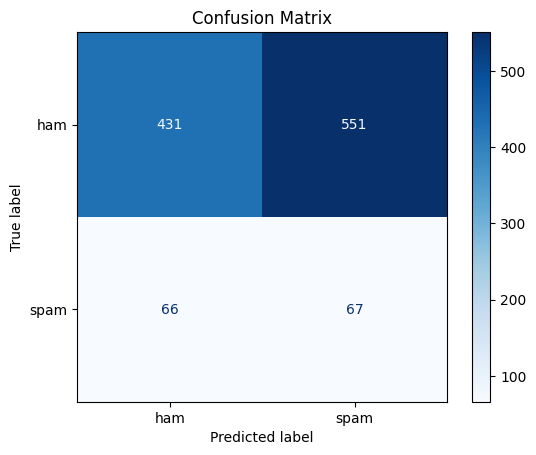

35/35 [==============================] - 0s 4ms/step


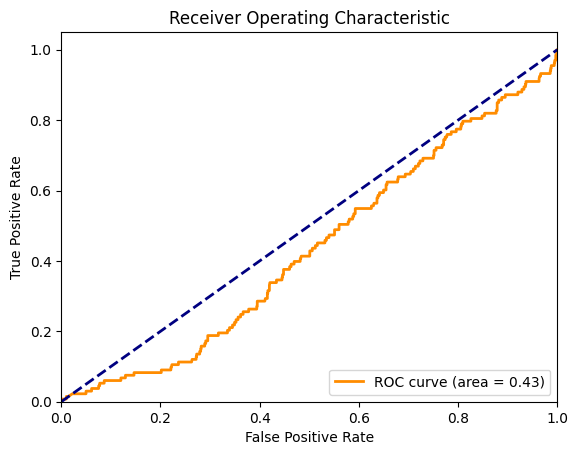

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Assuming the previous code has prepared the model and data
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Evaluate the model
text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

# Generate predictions
Y_pred = model.predict(test_padded)

# Convert predictions to binary
Y_pred_classes = (Y_pred > 0.5).astype("int32")

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
Y_pred_prob = model.predict(test_padded)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [20]:
model.save('spam_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
